this idea is form datascienceplus.com

In time series analysis, structural changes represent shocks impacting the evolution with time of the data generating process. That is relevant because one of the key assumptions of the Box-Jenkins methodology is that the structure of the data generating process does not change over time. How can structural changes be identified ?

In [4]:
library(strucchange) # identify structural change
library(astsa) #Applied Statistical Time Series Analysis
library(fUnitRoots) # Rmetrics - Modelling Trends and Unit Roots

Warning message:
"package 'fUnitRoots' was built under R version 3.4.3"Loading required package: timeDate
Loading required package: timeSeries
Warning message:
"package 'timeSeries' was built under R version 3.4.3"
Attaching package: 'timeSeries'

The following object is masked from 'package:zoo':

    time<-

Loading required package: fBasics
Warning message:
"package 'fBasics' was built under R version 3.4.3"
Attaching package: 'fBasics'

The following object is masked from 'package:astsa':

    nyse



In [5]:
# data exploration

In [6]:
data('globtemp')

In [7]:
globtemp

Time Series:
Start = 1880 
End = 2015 
Frequency = 1 
  [1] -0.20 -0.11 -0.10 -0.20 -0.28 -0.31 -0.30 -0.33 -0.20 -0.11 -0.37 -0.24
 [13] -0.27 -0.30 -0.31 -0.22 -0.15 -0.11 -0.28 -0.16 -0.09 -0.15 -0.28 -0.36
 [25] -0.45 -0.28 -0.23 -0.40 -0.44 -0.47 -0.43 -0.44 -0.35 -0.35 -0.16 -0.11
 [37] -0.33 -0.40 -0.26 -0.23 -0.26 -0.21 -0.27 -0.24 -0.28 -0.20 -0.09 -0.20
 [49] -0.21 -0.36 -0.13 -0.09 -0.17 -0.28 -0.13 -0.19 -0.15 -0.02 -0.02 -0.03
 [61]  0.08  0.13  0.10  0.14  0.26  0.12 -0.03 -0.04 -0.09 -0.09 -0.17 -0.06
 [73]  0.01  0.08 -0.12 -0.14 -0.20  0.03  0.06  0.03 -0.03  0.05  0.02  0.06
 [85] -0.20 -0.10 -0.05 -0.02 -0.07  0.07  0.03 -0.09  0.01  0.15 -0.08 -0.01
 [97] -0.11  0.18  0.07  0.16  0.27  0.32  0.13  0.31  0.16  0.12  0.19  0.33
[109]  0.40  0.28  0.44  0.42  0.23  0.24  0.32  0.46  0.34  0.48  0.63  0.42
[121]  0.42  0.55  0.63  0.62  0.55  0.69  0.63  0.66  0.54  0.64  0.72  0.60
[133]  0.63  0.66  0.75  0.87

In [8]:
summary(globtemp)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.47000 -0.21000 -0.07500  0.01838  0.18250  0.87000 

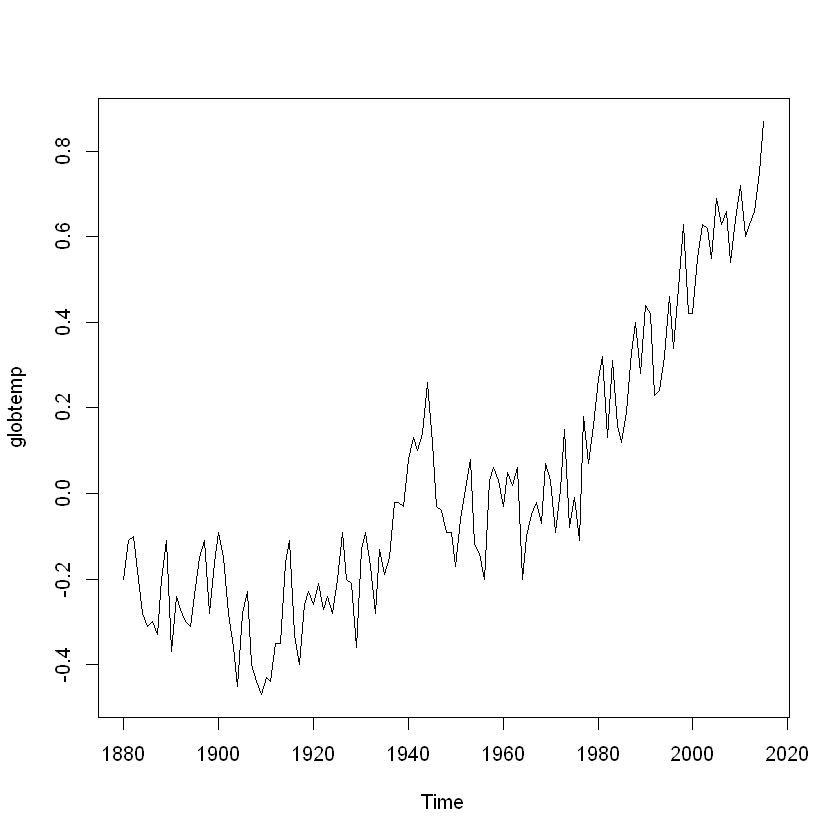

In [12]:
plot(globtemp,type ='l')

In [10]:
# THERE IS A INCREASE IN TEMPERATURE

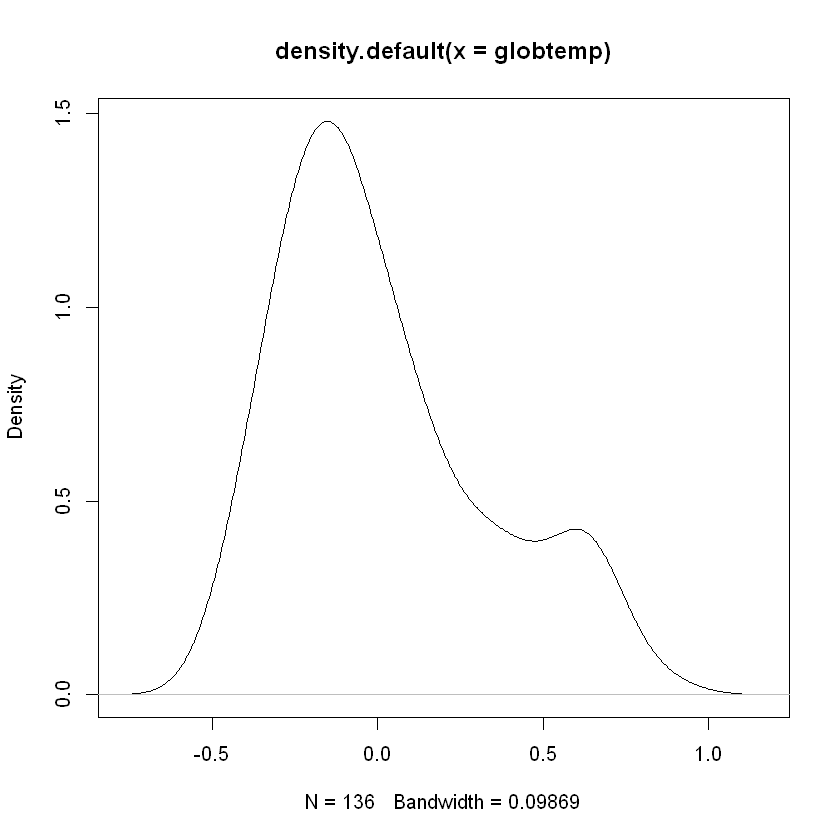

In [13]:
plot(density(globtemp))

In [ ]:
# Augmented Dickey-Fuller test with type = “ct”


Title:
 Augmented Dickey-Fuller Unit Root Test

Test Results:


Description:
 Tue Dec 19 12:29:10 2017 by user: amogh


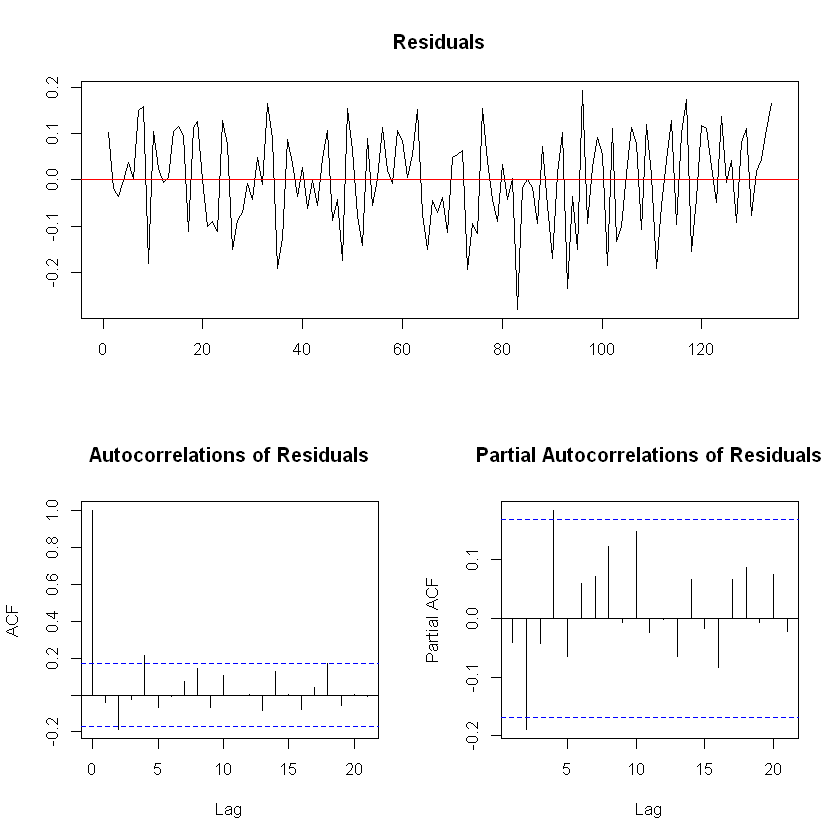

In [29]:
urdfTest(globtemp,type = c('ct'),doplot = T) # is the trend random walk

level structural changes
trend structural changes
polinomial fit structural changes
auto-regressive model structural changes

In [30]:
# level structural change

In [31]:
summary(lm(globtemp~1))


Call:
lm(formula = globtemp ~ 1)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.48838 -0.22838 -0.09338  0.16412  0.85162 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  0.01838    0.02721   0.676      0.5

Residual standard error: 0.3173 on 135 degrees of freedom


In [32]:
global_win <- window(globtemp,end = 2000)

In [34]:
lev_fit <- lm(global_win ~ 1)
summary(lev_fit)


Call:
lm(formula = global_win ~ 1)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.41017 -0.17017 -0.04017  0.13983  0.68983 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) -0.05983    0.02161  -2.769  0.00652 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2377 on 120 degrees of freedom


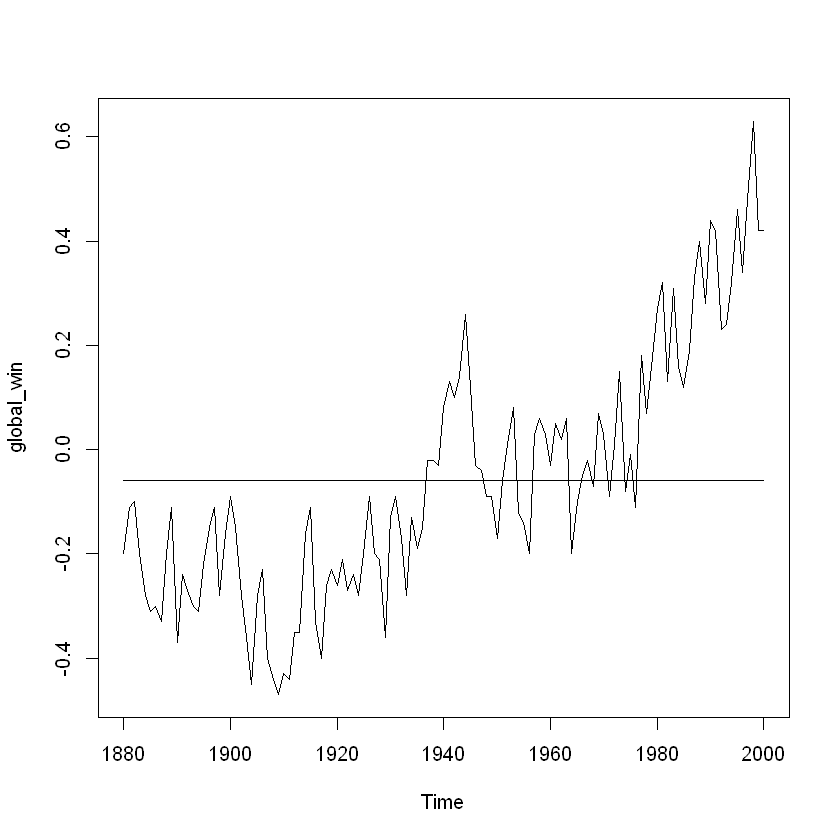

In [41]:
plot(global_win)
lines(ts(fitted(lev_fit),start = 1880,frequency = 1))

In [42]:
global_break = breakpoints(global_win ~ 1)

In [43]:
summary(global_break)


	 Optimal (m+1)-segment partition: 

Call:
breakpoints.formula(formula = global_win ~ 1)

Breakpoints at observation number:
                       
m = 1               97 
m = 2         57    100
m = 3      39 57    100
m = 4   21 39 57    100
m = 5   21 39 57 75 99 

Corresponding to breakdates:
                                
m = 1                       1976
m = 2             1936      1979
m = 3        1918 1936      1979
m = 4   1900 1918 1936      1979
m = 5   1900 1918 1936 1954 1978

Fit:
                                                         
m   0        1        2        3        4        5       
RSS    6.781    2.796    1.393    1.341    1.232    1.225
BIC    4.300  -93.292 -168.004 -163.018 -163.728 -154.776

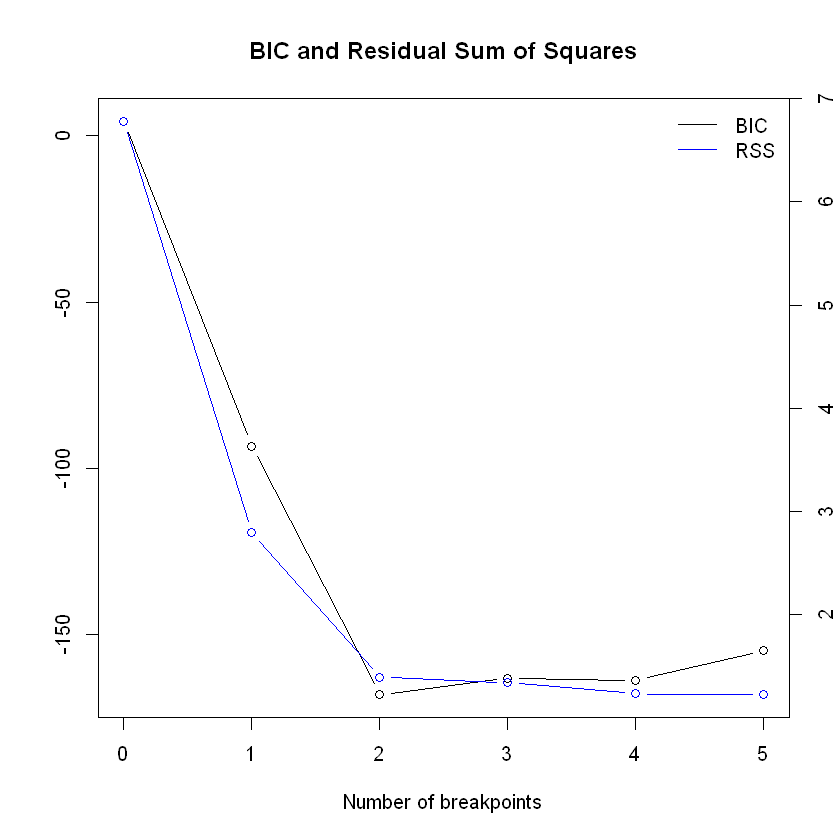

In [44]:
plot(global_break)

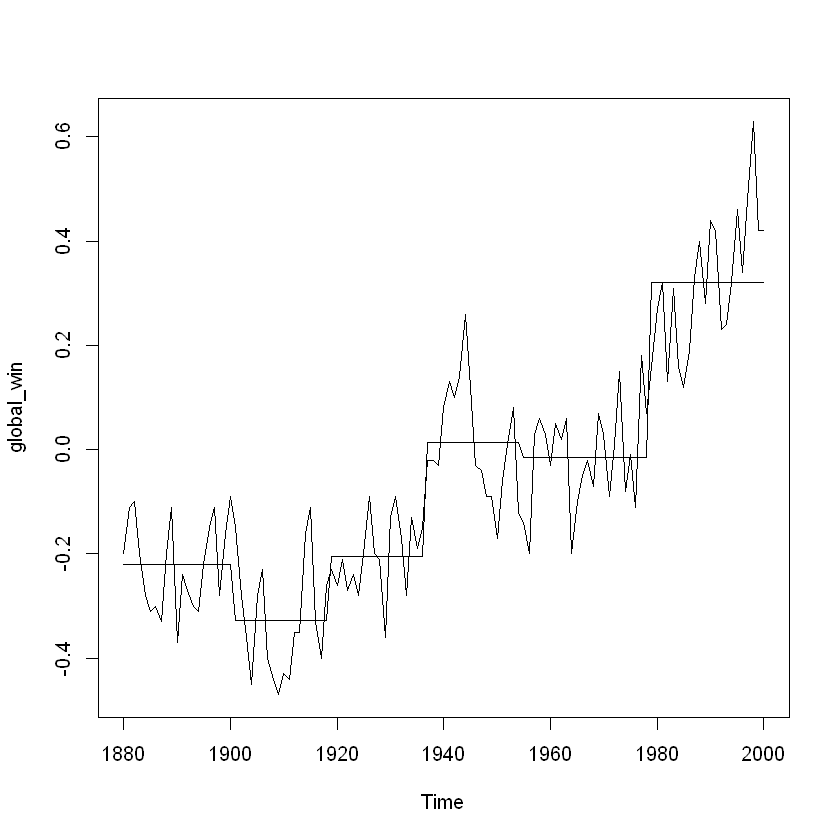

In [50]:
plot(global_win)
lines(fitted(global_break,breaks = 5))
#lines(confint(global_break, breaks = 5))

In [52]:
breakdates(global_break,breaks = 5)

[1] 1900 1918 1936 1954 1978

In [56]:
coef(global_break)

,(Intercept)
1880 - 1936,-0.249473684
1937 - 1979,0.001627907
1980 - 2000,0.329047619


In [54]:
# trend structural change

In [57]:
l = length(globtemp)

In [59]:
tt <- 1:l

In [60]:
trend_fit <- lm(globtemp ~ tt)

In [61]:
summary(trend_fit)


Call:
lm(formula = globtemp ~ tt)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.33363 -0.11470 -0.02466  0.11932  0.38017 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.4600523  0.0273468  -16.82   <2e-16 ***
tt           0.0069844  0.0003464   20.16   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1586 on 134 degrees of freedom
Multiple R-squared:  0.7521,	Adjusted R-squared:  0.7503 
F-statistic: 406.6 on 1 and 134 DF,  p-value: < 2.2e-16


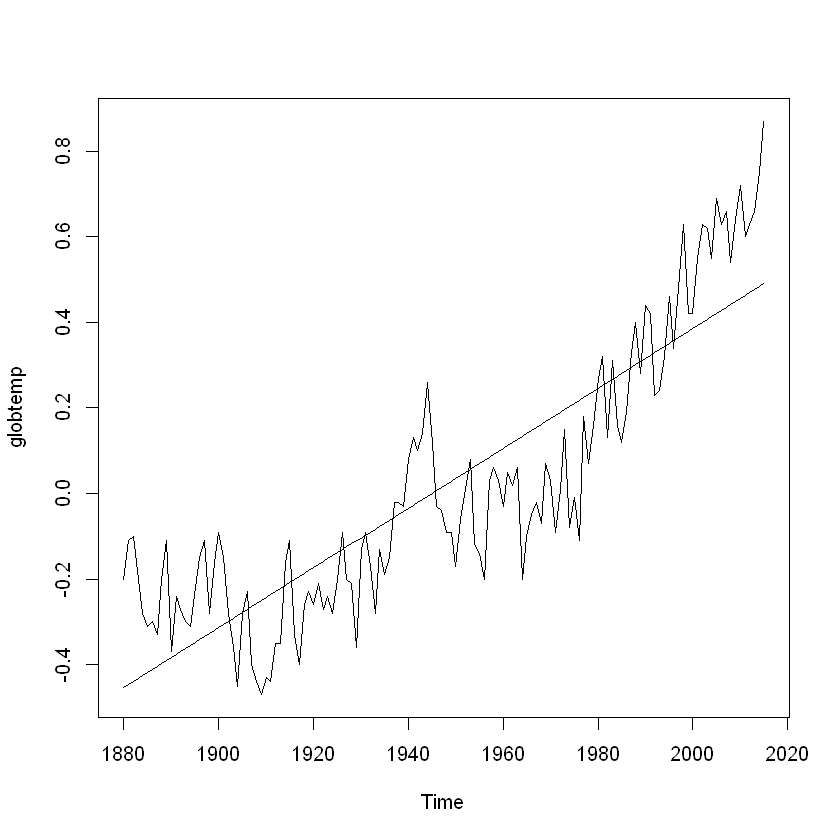

In [63]:
plot(globtemp)
lines(ts(fitted(trend_fit),start = 1880,frequency = 1))

In [64]:
globtemp_brk <- breakpoints(globtemp ~ tt, h = 0.1)
summary(globtemp_brk)


	 Optimal (m+1)-segment partition: 

Call:
breakpoints.formula(formula = globtemp ~ tt, h = 0.1)

Breakpoints at observation number:
                                    
m = 1                  84           
m = 2      23          84           
m = 3      27       66 84           
m = 4      23    53 66 84           
m = 5   16 32    53 66 84           
m = 6   16 32    53 66 84 97        
m = 7   16 32    53 66 84 97     117
m = 8   16 32    53 66 84 97 110 123
m = 9   14 27 40 53 66 84 97 110 123

Corresponding to breakdates:
                                                    
m = 1                            1963               
m = 2        1902                1963               
m = 3        1906           1945 1963               
m = 4        1902      1932 1945 1963               
m = 5   1895 1911      1932 1945 1963               
m = 6   1895 1911      1932 1945 1963 1976          
m = 7   1895 1911      1932 1945 1963 1976      1996
m = 8   1895 1911      1932 1945 1963 1976

In [65]:
breakdates(globtemp_brk, breaks = 4)

[1] 1902 1932 1945 1963

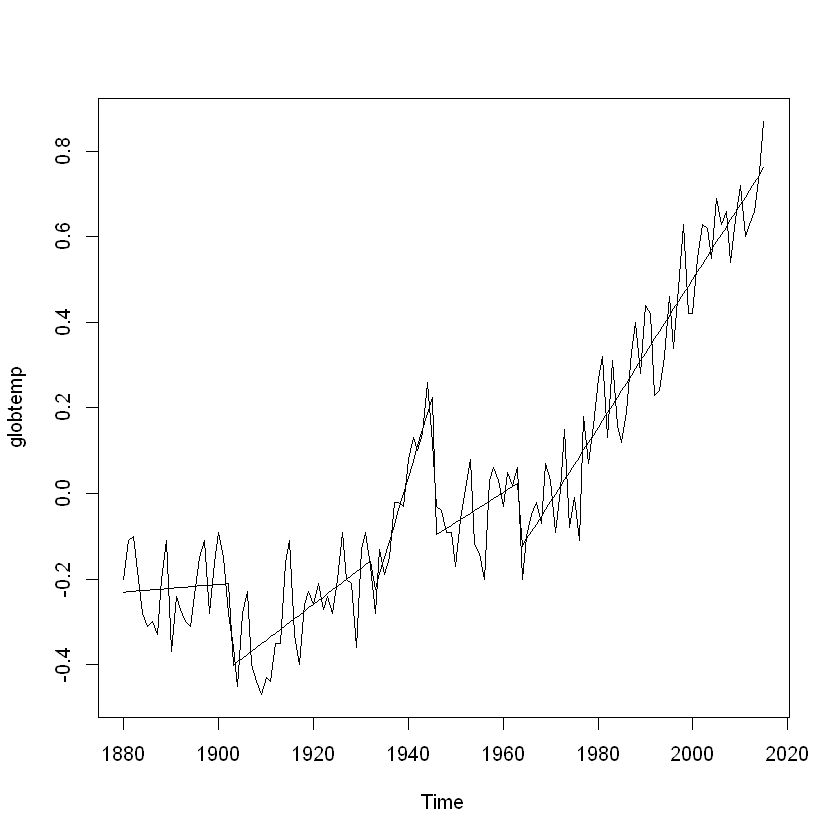

In [66]:
plot(globtemp)
lines(fitted(globtemp_brk))

In [67]:
# polinomial fit structural changes

In [68]:
pol_fit <- lm(globtemp ~ tt + I(tt^2))

In [69]:
summary(pol_fit)


Call:
lm(formula = globtemp ~ tt + I(tt^2))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.27014 -0.08379  0.00685  0.07299  0.38625 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.124e-01  3.015e-02  -7.045 9.02e-11 ***
tt          -3.784e-03  1.016e-03  -3.725 0.000288 ***
I(tt^2)      7.860e-05  7.183e-06  10.943  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1155 on 133 degrees of freedom
Multiple R-squared:  0.8696,	Adjusted R-squared:  0.8676 
F-statistic: 443.3 on 2 and 133 DF,  p-value: < 2.2e-16


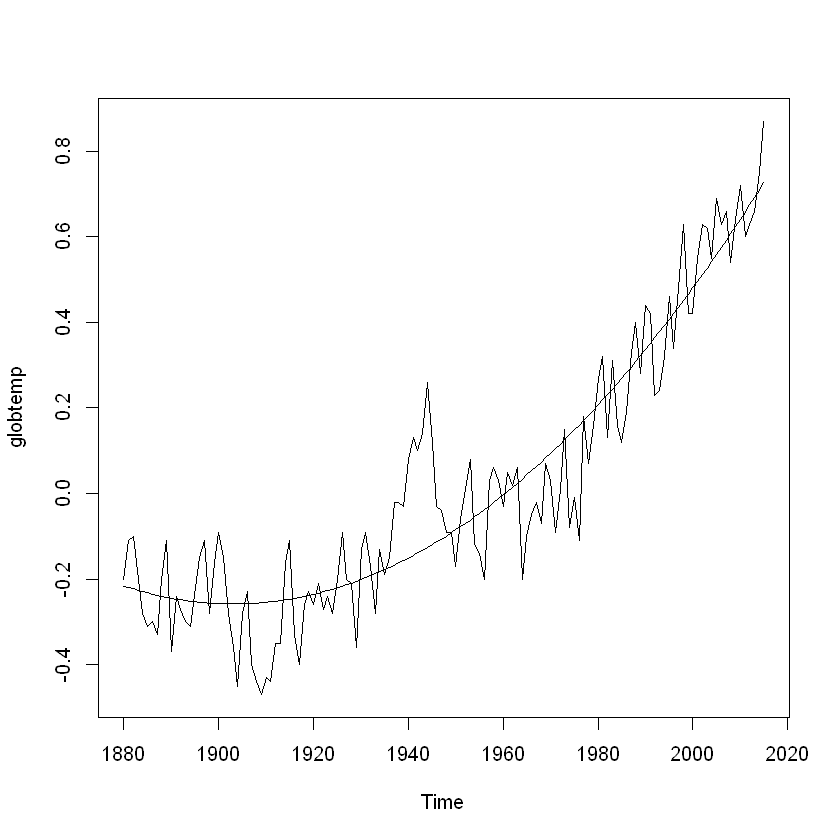

In [71]:
plot(globtemp, type = 'l')
lines(ts(fitted(pol_fit),start = 1880, frequency = 1))

In [72]:
globtemp_brk <- breakpoints(globtemp ~ tt + I(tt^2), data = globtemp, h = 0.1)
summary(globtemp_brk)


	 Optimal (m+1)-segment partition: 

Call:
breakpoints.formula(formula = globtemp ~ tt + I(tt^2), h = 0.1, 
    data = globtemp)

Breakpoints at observation number:
                                    
m = 1               66              
m = 2   22          66              
m = 3   22          66 84           
m = 4   20 36       66 84           
m = 5   20 36       66 84 97        
m = 6   20 36    53 66 84 97        
m = 7   20 36    53 66 84 97 112    
m = 8   20 36    53 66 84 97 110 123
m = 9   19 32 45 58 71 84 97 110 123

Corresponding to breakdates:
                                                    
m = 1                       1945                    
m = 2   1901                1945                    
m = 3   1901                1945 1963               
m = 4   1899 1915           1945 1963               
m = 5   1899 1915           1945 1963 1976          
m = 6   1899 1915      1932 1945 1963 1976          
m = 7   1899 1915      1932 1945 1963 1976 1991     
m = 8   18

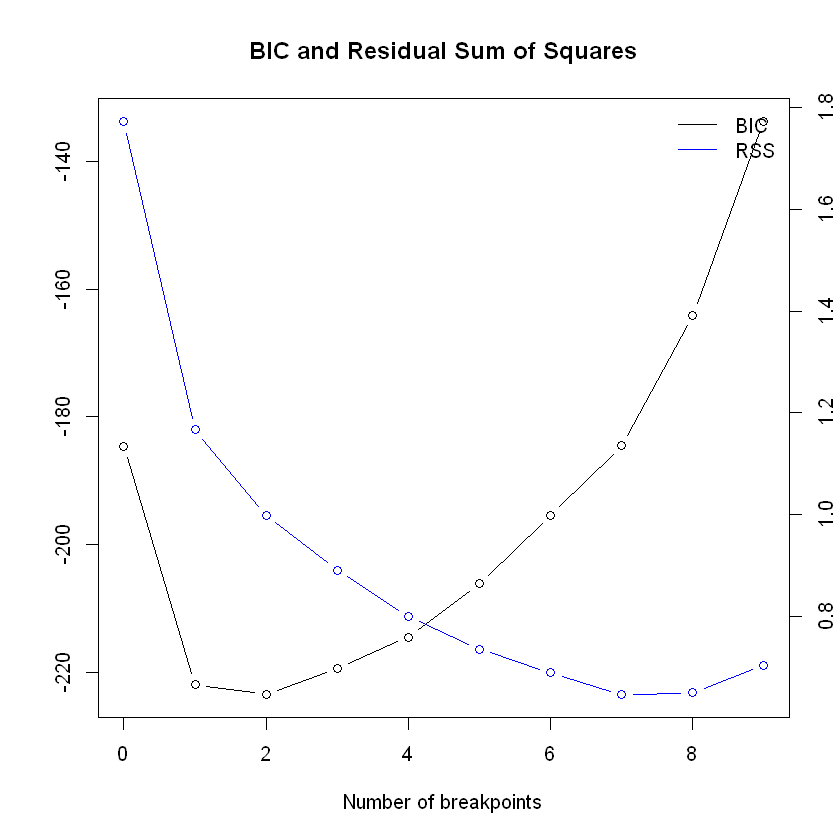

In [73]:
plot(globtemp_brk)

In [74]:
breakdates(globtemp_brk, breaks = 2)

[1] 1901 1945

In [75]:
# auto_regressive 

In [76]:
diff_group <- diff(globtemp) - mean(diff(globtemp))

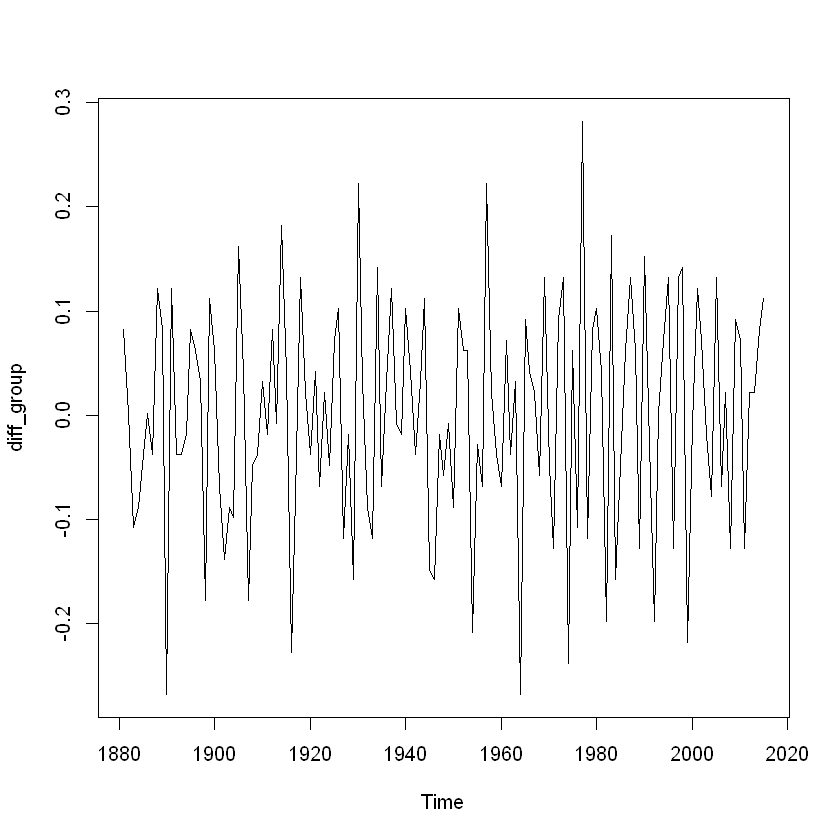

In [79]:
plot(diff_group)


In [80]:
lag_1 = lag(diff_group , -1)

In [81]:
lag_2 = lag(diff_group,-2)

In [83]:
globtemp_df <- ts.intersect(dd0 = diff_group, dd1 = lag_1, dd2 = lag_2)
summary(lm(dd0 ~ dd1 + dd2 - 1, data = globtemp_df))


Call:
lm(formula = dd0 ~ dd1 + dd2 - 1, data = globtemp_df)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.268417 -0.073502  0.007569  0.073164  0.266005 

Coefficients:
    Estimate Std. Error t value Pr(>|t|)    
dd1 -0.30442    0.08463  -3.597 0.000455 ***
dd2 -0.27040    0.08463  -3.195 0.001752 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1029 on 131 degrees of freedom
Multiple R-squared:  0.1246,	Adjusted R-squared:  0.1112 
F-statistic: 9.323 on 2 and 131 DF,  p-value: 0.0001639
